<a href="https://colab.research.google.com/github/azminaf/Classification_Part1/blob/main/Classification_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification -- K - Nearest Neighbour**



###**Data 1 -- IRIS Flower Classification**


##**Flower Predictions and Classifications Using Sepal_length and Sepal_Width**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Data Mining/iris_cleaned.csv')
iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


### **Encoding Label**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris['class_encode'] = encoder.fit_transform(iris['class']) #Menyimpan kolom class yang sudah di encode kedalam kolom baru 'class_encode'
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,class_encode
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
5,5.4,3.9,1.7,0.4,Setosa,0
6,4.6,3.4,1.4,0.3,Setosa,0
7,5.0,3.4,1.5,0.2,Setosa,0
8,4.4,2.9,1.4,0.2,Setosa,0
9,4.9,3.1,1.5,0.1,Setosa,0


###**Visualisasi Dataset**

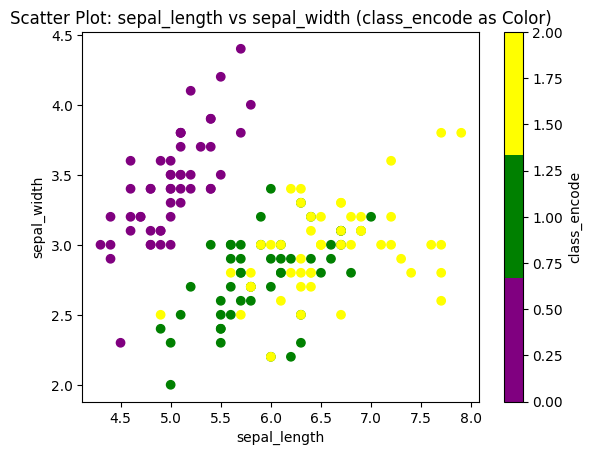

In [ ]:
from matplotlib.colors import ListedColormap

plt.scatter(iris['sepal_length'], iris['sepal_width'], alpha=1, c=iris['class_encode'], cmap = ListedColormap(['purple', 'green', 'yellow'])) #c adalah variabel sebagai pembeda warna (color), dan harus angka, c biasanya label / target
plt.colorbar(label='class_encode')
plt.title('Scatter Plot: sepal_length vs sepal_width (class_encode as Color)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

### **Pelatihan Model**

In [ ]:
X = iris[['sepal_length', 'sepal_width']]
y = iris['class_encode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

print('Ukuran data latih:', X_train.shape)
print('Ukuran data uji:', X_test.shape)

Ukuran data latih: (117, 2)
Ukuran data uji: (33, 2)


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model:', accuracy)

Akurasi model: 0.8484848484848485


###**Evaluasi Model**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[12  0  0]
 [ 0  9  1]
 [ 0  4  7]]


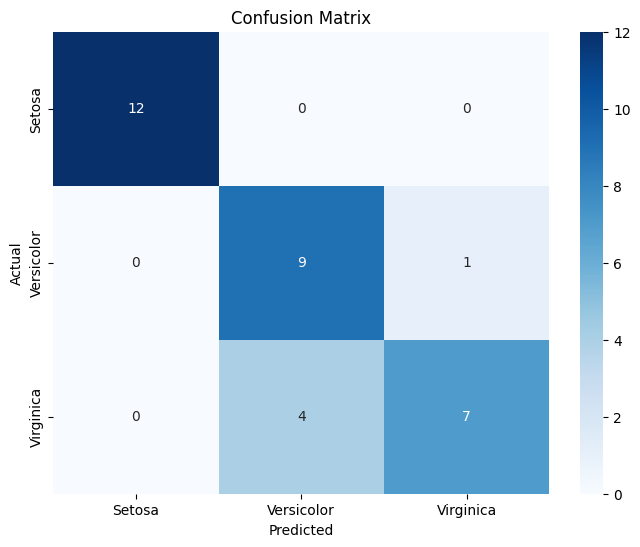

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris['class'].unique(), yticklabels=iris['class'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
clasif_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(clasif_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      0.60      0.63        10
           2       0.67      0.73      0.70        11

    accuracy                           0.79        33
   macro avg       0.78      0.78      0.78        33
weighted avg       0.79      0.79      0.79        33



In [ ]:
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'K = {k}, Akurasi: {accuracy}')

K = 1, Akurasi: 0.696969696969697
K = 2, Akurasi: 0.7575757575757576
K = 3, Akurasi: 0.7878787878787878
K = 4, Akurasi: 0.7272727272727273
K = 5, Akurasi: 0.7878787878787878
K = 6, Akurasi: 0.8484848484848485
K = 7, Akurasi: 0.7575757575757576
K = 8, Akurasi: 0.8484848484848485
K = 9, Akurasi: 0.7878787878787878
K = 10, Akurasi: 0.8181818181818182
K = 11, Akurasi: 0.7575757575757576
K = 12, Akurasi: 0.7878787878787878
K = 13, Akurasi: 0.7575757575757576
K = 14, Akurasi: 0.7878787878787878
K = 15, Akurasi: 0.8181818181818182
K = 16, Akurasi: 0.8181818181818182
K = 17, Akurasi: 0.8181818181818182
K = 18, Akurasi: 0.7878787878787878
K = 19, Akurasi: 0.8484848484848485
K = 20, Akurasi: 0.7878787878787878


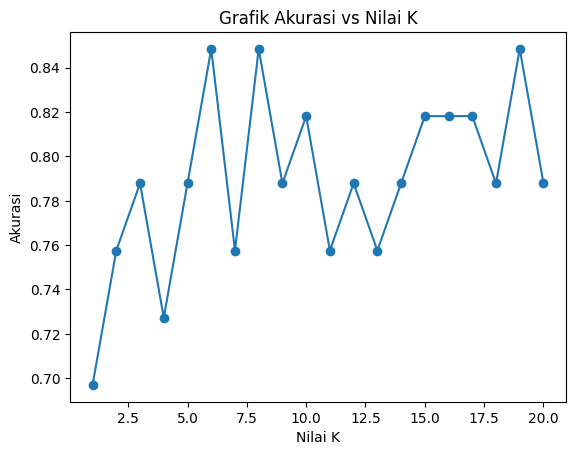

In [ ]:
plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi vs Nilai K')
plt.show()


##**Flower Predictions and Classifications Using Sepal_length and Petal_length**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,class_encode
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
5,5.4,3.9,1.7,0.4,Setosa,0
6,4.6,3.4,1.4,0.3,Setosa,0
7,5.0,3.4,1.5,0.2,Setosa,0
8,4.4,2.9,1.4,0.2,Setosa,0
9,4.9,3.1,1.5,0.1,Setosa,0


###**Buat Visualisasi**

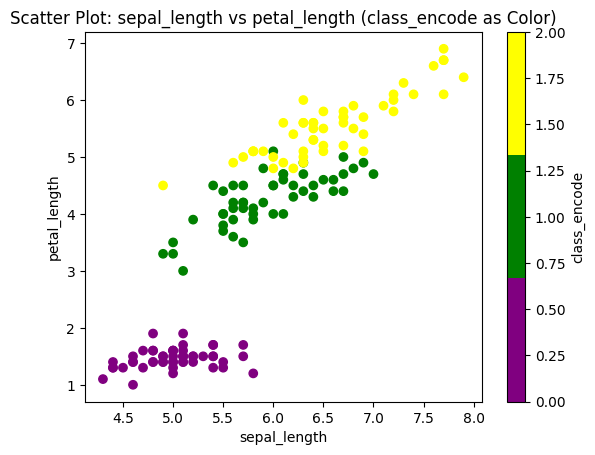

In [ ]:
from matplotlib.colors import ListedColormap

plt.scatter(iris['sepal_length'], iris['petal_length'], alpha=1, c=iris['class_encode'], cmap = ListedColormap(['purple', 'green', 'yellow'])) #c adalah variabel sebagai pembeda warna (color), dan harus angka, c biasanya label / target
plt.colorbar(label='class_encode')
plt.title('Scatter Plot: sepal_length vs petal_length (class_encode as Color)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

###**Training Model**

In [ ]:
X = iris[['sepal_length', 'petal_length']]
y = iris['class_encode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

print('Ukuran data latih:', X_train.shape)
print('Ukuran data uji:', X_test.shape)

Ukuran data latih: (117, 2)
Ukuran data uji: (33, 2)


In [ ]:
model_1 = KNeighborsClassifier(n_neighbors=9)
model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = model_1.predict(X_test)
#print(y_pred)
accuracy_1 = accuracy_score(y_test, y_pred)
print('Akurasi model:', accuracy_1)

Akurasi model: 1.0


###**Evaluasi Model**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
conf_matrix_1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix_1)

Confusion Matrix:
[[12  0  0]
 [ 0 10  0]
 [ 0  0 11]]


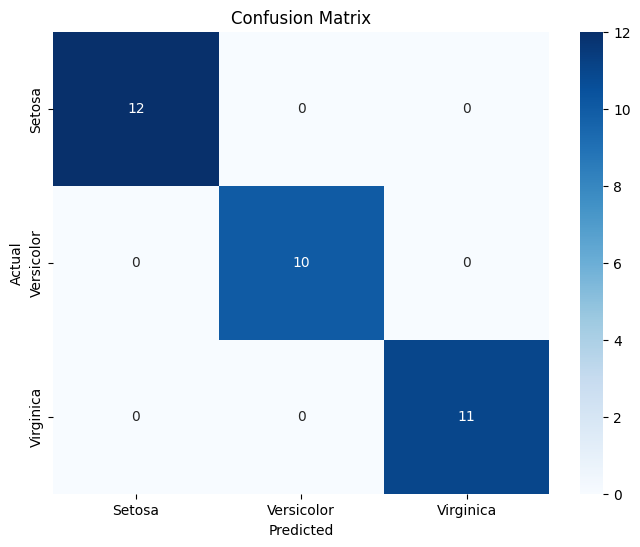

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', xticklabels=iris['class'].unique(), yticklabels=iris['class'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
clasif_report_1 = classification_report(y_test, y_pred)
print('Classification Report:')
print(clasif_report_1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
k_range = range(1, 25)
accuracy_scores = []

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'K = {k}, Akurasi: {accuracy}')

K = 1, Akurasi: 0.9393939393939394
K = 2, Akurasi: 0.9393939393939394
K = 3, Akurasi: 0.9696969696969697
K = 4, Akurasi: 0.9696969696969697
K = 5, Akurasi: 0.9696969696969697
K = 6, Akurasi: 0.9696969696969697
K = 7, Akurasi: 0.9696969696969697
K = 8, Akurasi: 0.9393939393939394
K = 9, Akurasi: 1.0
K = 10, Akurasi: 1.0
K = 11, Akurasi: 1.0
K = 12, Akurasi: 1.0
K = 13, Akurasi: 1.0
K = 14, Akurasi: 1.0
K = 15, Akurasi: 1.0
K = 16, Akurasi: 1.0
K = 17, Akurasi: 1.0
K = 18, Akurasi: 1.0
K = 19, Akurasi: 1.0
K = 20, Akurasi: 1.0
K = 21, Akurasi: 0.9696969696969697
K = 22, Akurasi: 1.0
K = 23, Akurasi: 1.0
K = 24, Akurasi: 1.0


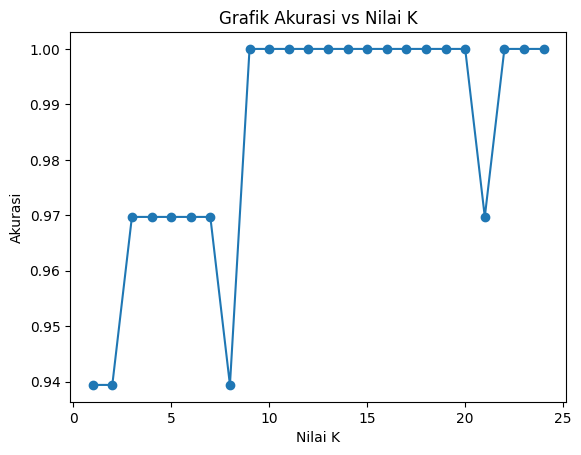

In [ ]:
plt.plot(k_range, accuracy_scores, marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi vs Nilai K')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris['class_encode'] = encoder.fit_transform(iris['class']) #Menyimpan kolom class yang sudah di encode kedalam kolom baru 'class_encode'
iris['class_invers_encode'] = encoder.inverse_transform(iris['class_encode']) #Menyimpan kolom class yang sudah di encode kedalam kolom baru 'class_encode'
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,class_encode,class_invers_encode
0,5.1,3.5,1.4,0.2,Setosa,0,Setosa
1,4.9,3.0,1.4,0.2,Setosa,0,Setosa
2,4.7,3.2,1.3,0.2,Setosa,0,Setosa
3,4.6,3.1,1.5,0.2,Setosa,0,Setosa
4,5.0,3.6,1.4,0.2,Setosa,0,Setosa
5,5.4,3.9,1.7,0.4,Setosa,0,Setosa
6,4.6,3.4,1.4,0.3,Setosa,0,Setosa
7,5.0,3.4,1.5,0.2,Setosa,0,Setosa
8,4.4,2.9,1.4,0.2,Setosa,0,Setosa
9,4.9,3.1,1.5,0.1,Setosa,0,Setosa


In [ ]:
import pandas as pd
new_data_1 = pd.DataFrame([[9.8, 2.4], [4.92, 1.55], [4.72, 1.43], [5.12, 1.83], [6.173, 1.22], [3.49, 1.42]], columns = ['sepal_length', 'petal_length'])
new_predict_1 = model_1.predict(new_data_1)
new_encode_1 = encoder.inverse_transform(new_predict_1)
print(new_encode_1)


['Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
